In [1]:
%load_ext autoreload
%autoreload 2

# Import 

In [2]:
from bosonic import Qubit, GKPQubit, execute, BosonicRegister, BosonicCircuit
import numpy as np
import matplotlib.pyplot as plt

import jaxquantum as jqt
import jax.numpy as jnp

/home/shanj/miniconda3/envs/jax-new/lib/python3.12/site-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [3]:
# This cell uses `bosonic_custom` a module of gates and simulations specific to the MIT EQuS Bosonic QEC team. 
# As such, this code will not run for everyone, but can still be used as an example. 

import sys
sys.path.append("../../../bosonic-sims/")

from bosonic_custom import NumSplitCDGate

In [4]:
# parameters & constants
π = jnp.pi ; χ = 2*π * 2 ; K = 2*π * 0
beta = jnp.sqrt(2)*2*(2.5 + 2j)
N = 50

# set up operators
a = jqt.destroy(N)
a_dag = jqt.dag(a)
I_q = jnp.eye(2)
I_a = jnp.eye(N)
aq = a ^ I_q
aq_dag = jqt.dag(aq)

# base hamiltonian
H0 = ((χ*a_dag@a)^jqt.sigmaz()) + (K/2)*aq_dag @ aq_dag @ aq @ aq
ts = jnp.linspace(0.0, 2*π/χ, 251)

# set up new circuit
breg = BosonicRegister([GKPQubit(params={"N":N}),Qubit()]) # create register
bcirc = BosonicCircuit(breg) # create circuit
bcirc.add(NumSplitCDGate, (0,1),{"beta": beta, "chi": χ}, ts) # add gate
results = execute(bcirc, "hamiltonian_jax", H0=H0, c_ops=[]) # run circuit simulation
results.calc_expect(aq, "aq")
%timeit results = execute(bcirc, "hamiltonian_jax", H0=H0, c_ops=[])

/home/shanj/miniconda3/envs/jax-new/lib/python3.12/site-packages/equinox/_jit.py:49: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
  out = fun(*args, **kwargs)


111 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
results = execute(bcirc, "hamiltonian_jax", H0=H0)

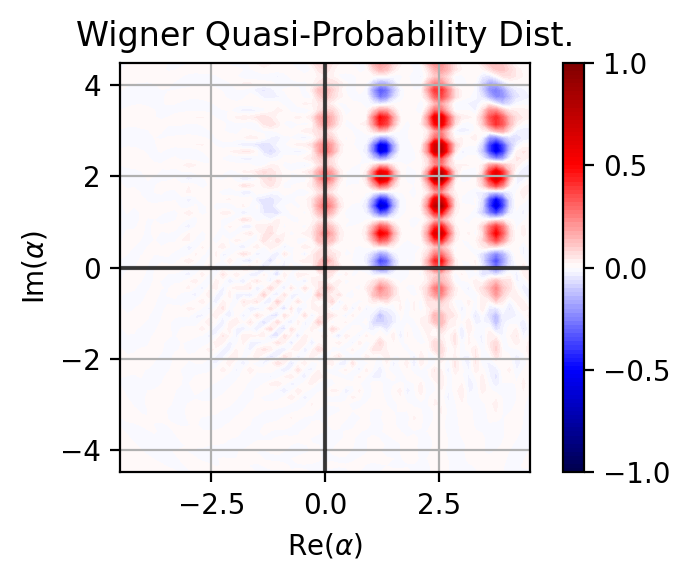

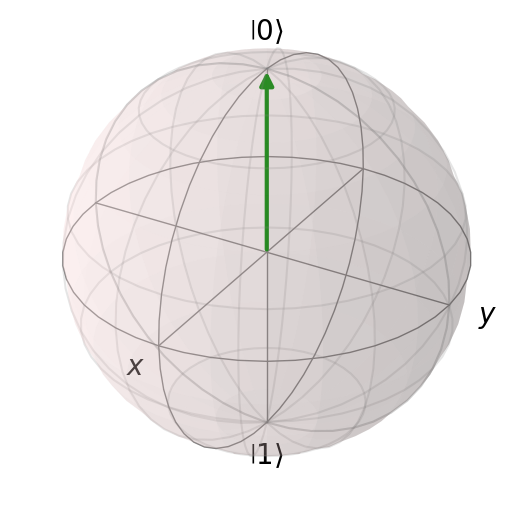

<Figure size 640x480 with 0 Axes>

In [6]:
results = execute(bcirc, "hamiltonian_jax", H0=H0, c_ops=[])
results.plot(bcirc, 0)
results.plot(bcirc, 1)

In [7]:
results.calc_expect(aq, "aq")

In [8]:
def plot_trajectory(ts, expectation):
    fig, axs = plt.subplots(1,2, dpi=200, figsize=(8,3))
    axs[0].plot(np.real(expectation), np.imag(expectation))
    axs[0].set_xlabel(r"$\langle \hat{q}\rangle$")
    axs[0].set_ylabel(r"$\langle \hat{p}\rangle$")
    
    axs[1].plot(ts, np.real(expectation), label=r"$\langle \hat{q}\rangle$")
    axs[1].plot(ts, np.imag(expectation), label=r"$\langle \hat{p}\rangle$")
    axs[1].set_ylabel(r'Expectation of quadratures')
    axs[1].set_xlabel('Time')
    axs[1].legend()

    fig.tight_layout()
    plt.show()

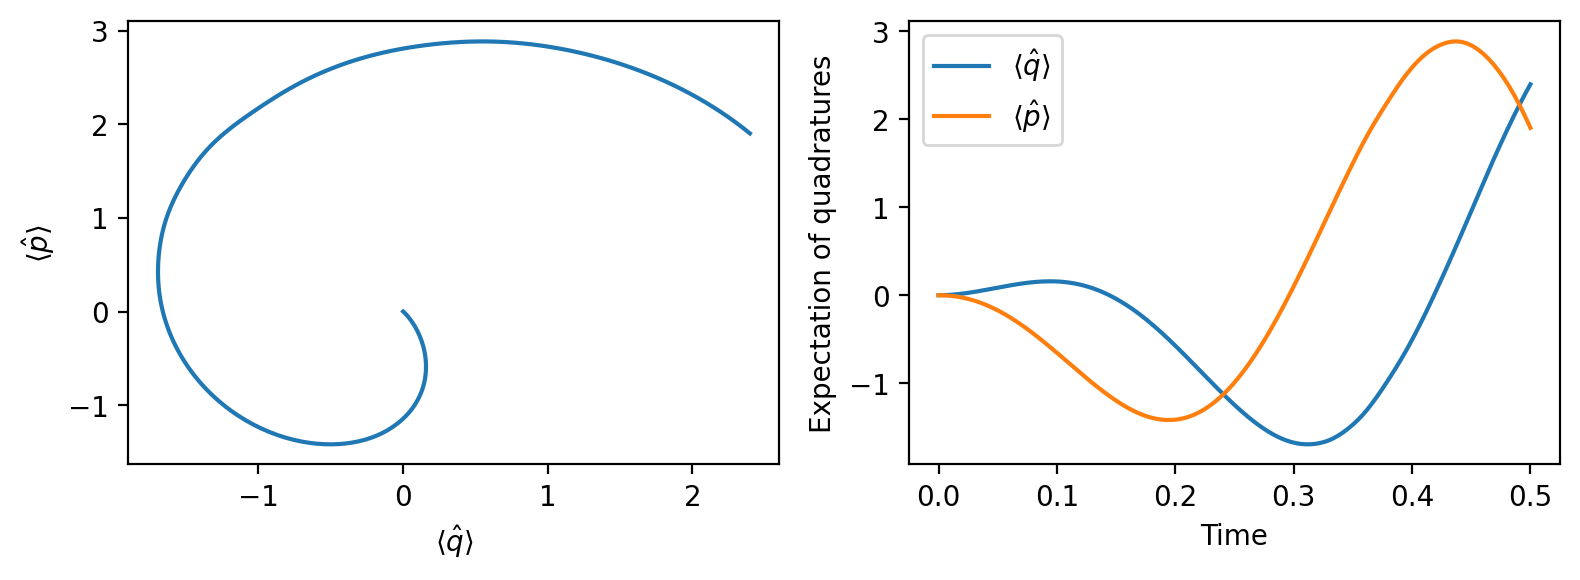

1.9022420437503142


In [9]:
expt = results[0]["aq"]
plot_trajectory(ts, expt)
print(np.imag(expt[-1]))